### Vaibhav Kumar
### RollNo 19

### Feature Selection - Univariate

In [1]:
from sklearn. datasets import load_breast_cancer
from sklearn. feature_selection import SelectPercentile, SelectKBest
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
cancer=load_breast_cancer()

In [3]:
print(cancer.data.shape)

(569, 30)


In [4]:
# get deterministic random numbers
rng=np.random.RandomState(42)
noise=rng.normal(size=(len(cancer.data),50))


In [5]:
print(noise.data.shape)

(569, 50)


In [6]:
#using horizontal stack we will add these data
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise=np.hstack([cancer.data, noise])


In [7]:
print(X_w_noise.data.shape)

(569, 80)


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X_w_noise, cancer.target, random_state=0, test_size=0.3)

In [13]:
#select = SelectPercentile(percentile=30) # use this line for one time and see accuracy then run other line and see the accuracy
select=SelectKBest(k=10)
select.fit(X_train, y_train)


SelectKBest()

In [10]:
#transform training set
X_train_selected = select.transform(X_train)
print ("X_train.shape{} ".format (X_train.shape))
print("X_train_selected. shape{}".format(X_train_selected.shape) )


X_train.shape(398, 80) 
X_train_selected. shape(398, 10)


[ True False  True  True False False  True  True False False False False
 False False False False False False False False  True False  True  True
 False False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]


([], [])

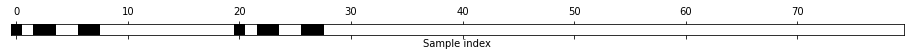

In [11]:
#now we will see that how many feature this algo choose
mask = select.get_support()
print(mask)
# visualize the mask -- black is True, white is False
plt.matshow(mask. reshape(1, -1), cmap='gray_r')
plt.xlabel(("Sample index"))
plt.yticks(())


In [12]:
from sklearn. tree import DecisionTreeClassifier
# transform test data
X_test_selected = select. transform(X_test)
lr = DecisionTreeClassifier()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}" .format (lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
lr.score(X_test_selected, y_test)))


Score with all features: 0.924
Score with only selected features: 0.947


# feature selection - Model Based 

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
select=SelectFromModel(RandomForestClassifier(n_estimators=10,random_state=42),threshold="median")

# Select from model
class selects all the features that have an impoertance measure of the features (as provided by the supervised model) greater than the provided threshold

In [15]:
select.fit(X_train,y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape{}".format(X_train.shape))
print("X_train_l1.shape{}".format(X_train_l1.shape))

X_train.shape(398, 80)
X_train_l1.shape(398, 40)


[ True  True  True  True  True  True  True  True False False  True False
  True  True False  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False False  True
 False False False  True False  True  True False False False  True False
 False  True False False False False  True False  True False  True False
 False  True False False False  True  True False  True  True False False
 False False False False False False False False]


([], [])

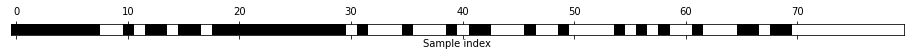

In [16]:
#now we will see that how many feature this algo choose
mask = select.get_support()
print(mask)
# visualize the mask -- black is True, white is False
plt.matshow(mask. reshape(1, -1), cmap='gray_r')
plt.xlabel(("Sample index"))
plt.yticks(())

In [17]:
X_test_l1 = select.transform(X_test)
score=SVC().fit(X_train,y_train).score(X_test,y_test)
print("Test Score:{:.3f}".format(score))
score=SVC().fit(X_train_l1,y_train).score(X_test_l1,y_test)
print("Test Score:{:.3f}".format(score))


Test Score:0.924
Test Score:0.924


# Iterative Feature Selection 

In [18]:
from sklearn.feature_selection import RFE
select=RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=30)
select.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=30)

[ True  True  True  True False  True  True  True  True False  True  True
  True  True False False  True  True False  True  True  True  True  True
  True  True  True  True  True  True False False False False  True  True
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False  True False False False False False False
 False  True False False False False False False]


([], [])

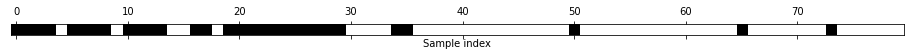

In [19]:
#now we will see that how many feature this algo choose
mask = select.get_support()
print(mask)
# visualize the mask -- black is True, white is False
plt.matshow(mask. reshape(1, -1), cmap='gray_r')
plt.xlabel(("Sample index"))
plt.yticks(())

In [ ]:
from sklearn.feature_selection import LogisticRegression
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score=LogisticRegression